### Importing libraries and Exploring the Dataset

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

In [5]:
# Read the dataset
insurance_df = pd.read_csv("insurance-data.csv")

In [6]:
# Display the first 10 rows in the dataset

insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
# Info about the data shape of data, type of individual columns

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
- la relación entre datos categoricos y continuos está equilibrada
- 7 atributos

### comprobación de valores perdidos `Nulls` y Outliers.

In [9]:
# Check for the null values
insurance_df.isna().apply(pd.value_counts)

/tmp/ipykernel_11269/800390610.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  insurance_df.isna().apply(pd.value_counts)


,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [15]:
insurance_df["age"].value_counts().head(5)

age
18    69
19    68
50    29
51    29
47    29
Name: count, dtype: int64

In [ ]:
En el caso de que haya valores NULL entonces saber como trabajar con ellos 

In [ ]:
### Checking outliers

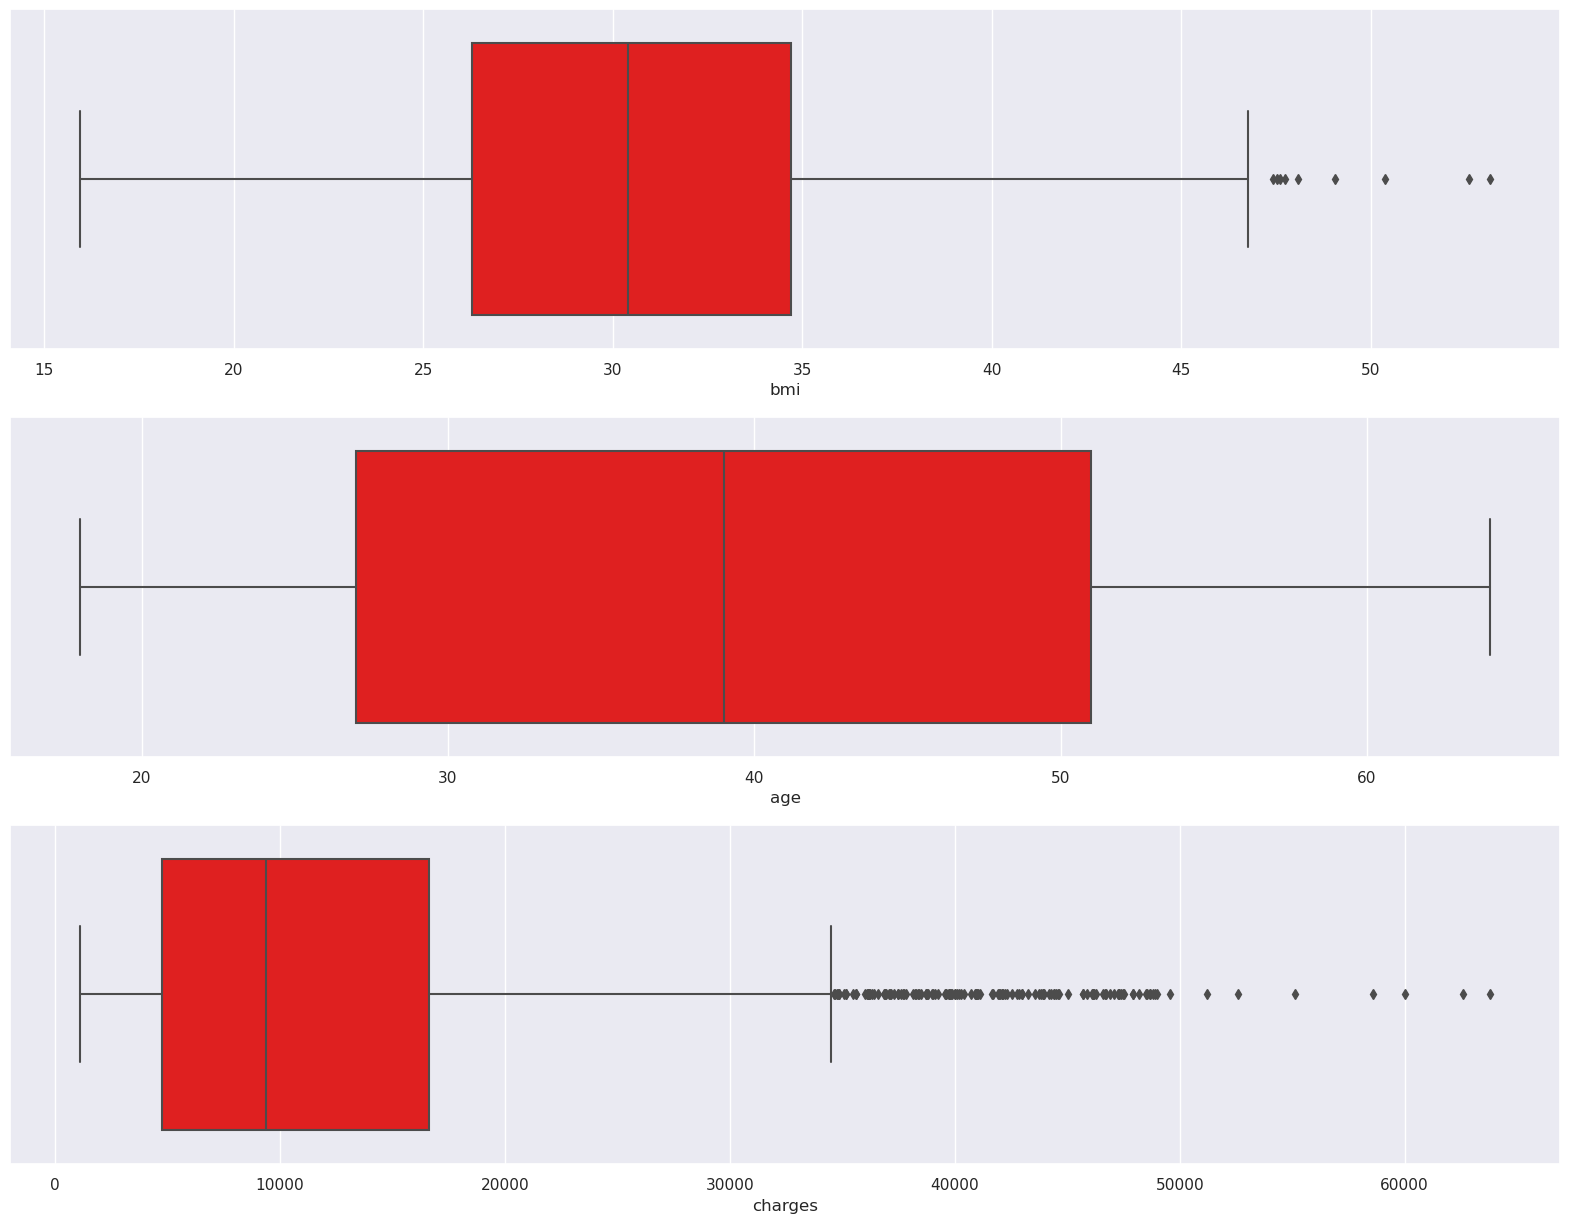

In [17]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_df.age, color='red')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_df.charges, color='red')

plt.show()

Lo que vemos es:

- bmi tiene valores extremos
- charges está muy sesgado, hay un montón de valores extremos.

In [20]:
# un breve resumen del dataset

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


la columna de la edad parece representativa de la verdadera edad de la distribución de la edad adulta con 39 de media

la columna de los niños, poca gente tiene mas de 2 niños, concretamente el porcentage superior al 75%


La cantidad reclamada está muy sesgada, ya que la mayoría de las personas requerirían atención médica básica y solo sufrirían enfermedades de las que cuesta más deshacerse